### ■ Sample Code for evaluation of representative algorithm

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('C:/github/NRMMF')
from _utils import functions as fxn

base_dir = 'C:/github/NRMMF' # clone directory

***
#### ① cv_data preparation (CVS1, CVS2, and CVS3)

In [2]:
intMat = np.array(pd.read_csv(base_dir+'/Representative_Methods/benchmark_datasets/drug_protein/mat_drug_protein_remove_homo.txt',sep='\t',header=None))

seeds = [7771, 8367, 22, 1812, 4659]
cvs1_data = fxn.cross_validation(intMat, seeds, cv=1, num=10, stratified=False)
cvs2_data = fxn.cross_validation(intMat, seeds, cv=0, num=10, stratified=False)
cvs3_data = fxn.cross_validation(intMat.T, seeds, cv=0, num=10, stratified=False)

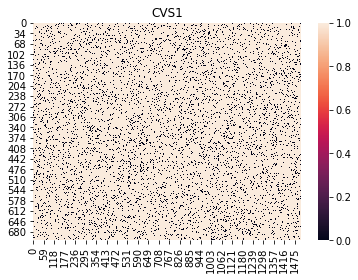

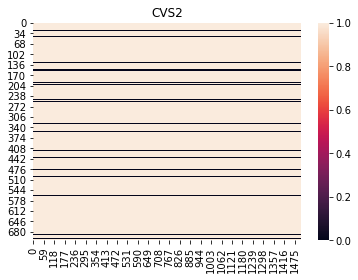

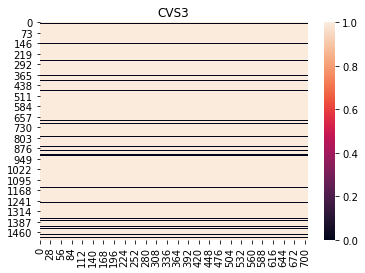

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# cvs1
sns.heatmap(cvs1_data[7771][0][0])
plt.title("CVS1")
plt.show()

# cvs2
sns.heatmap(cvs2_data[7771][0][0])
plt.title("CVS2")
plt.show()

# cvs3
sns.heatmap(cvs3_data[7771][0][0])
plt.title("CVS3")
plt.show()

Note that cvs3 has the disease set in the rows and the drug in the columns.
***
#### ② Example of representative method performance evaluation (NRLMF)
- You can choose method from seven representative methods, "NMF","GRNMF","LMF","NRLMF","CMF","TMF", and "IMC".
- This is an example about NRLMF grid search parameter tuning.

In [6]:
from Representative_Methods import cv_eval_tolx_models, cv_tolx_evaluator

Y = np.array(pd.read_csv(base_dir + '/Representative_Methods/benchmark_datasets/drug_protein/mat_drug_protein_remove_homo.txt',sep='\t',header=None)) # drug-protein benchmark dataset
drugMat = pd.read_pickle(base_dir + '/Representative_Methods/benchmark_datasets/drug_protein/drug_sim.pkl') # square similarity matrix for NRLMF
targetMat = pd.read_pickle(base_dir + '/Representative_Methods/benchmark_datasets/drug_protein/protein_sim.pkl') # square similarity matrix for NRLMF

Eval = cv_tolx_evaluator.CV_tolx_Evaluator()
Eval.set_data(Y=Y, cv_data=cvs1_data,drugMat=drugMat,targetMat=targetMat)
Eval.cv_optimize(method="NRLMF",eval_method="AUPR") # set algorithm name and evluation method

 20%|██        | 1/5 [00:20<01:21, 20.38s/it]

{'cfix': 5, 'K1': 5, 'K2': 5, 'num_factors': 50, 'theta': 1.0, 'lambda_d': 0.625, 'lambda_t': 0.625, 'alpha': 0.1, 'beta': 0.1, 'max_iter': 5000, 'tolx': 1, 'half_mask': False}
AUC : 0.5740852918207288 AUPR : 0.005634260840791011


 40%|████      | 2/5 [01:02<01:20, 26.76s/it]

{'cfix': 5, 'K1': 5, 'K2': 5, 'num_factors': 50, 'theta': 1.0, 'lambda_d': 0.625, 'lambda_t': 0.625, 'alpha': 0.1, 'beta': 0.1, 'max_iter': 5000, 'tolx': 0.1, 'half_mask': False}
AUC : 0.8157592221499792 AUPR : 0.06115303511466573


 60%|██████    | 3/5 [03:33<02:08, 64.23s/it]

{'cfix': 5, 'K1': 5, 'K2': 5, 'num_factors': 50, 'theta': 1.0, 'lambda_d': 0.625, 'lambda_t': 0.625, 'alpha': 0.1, 'beta': 0.1, 'max_iter': 5000, 'tolx': 0.01, 'half_mask': False}
AUC : 0.892159947628026 AUPR : 0.15949225410087606


 80%|████████  | 4/5 [29:49<08:37, 517.65s/it]

{'cfix': 5, 'K1': 5, 'K2': 5, 'num_factors': 50, 'theta': 1.0, 'lambda_d': 0.625, 'lambda_t': 0.625, 'alpha': 0.1, 'beta': 0.1, 'max_iter': 5000, 'tolx': 0.001, 'half_mask': False}
AUC : 0.8998740517512315 AUPR : 0.34492663477706087


100%|██████████| 5/5 [1:27:19<00:00, 1047.94s/it]

{'cfix': 5, 'K1': 5, 'K2': 5, 'num_factors': 50, 'theta': 1.0, 'lambda_d': 0.625, 'lambda_t': 0.625, 'alpha': 0.1, 'beta': 0.1, 'max_iter': 5000, 'tolx': 0.0001, 'half_mask': False}
AUC : 0.9135300238300574 AUPR : 0.3695723220817666


In [7]:
eval_opt = Eval.eval_opt
history = Eval.history

In [9]:
print(history[4])

[0.9135300238300574, 0.3695723220817666, 0.004774012071421086, 0.011298990476247075, {'cfix': 5, 'K1': 5, 'K2': 5, 'num_factors': 50, 'theta': 1.0, 'lambda_d': 0.625, 'lambda_t': 0.625, 'alpha': 0.1, 'beta': 0.1, 'max_iter': 5000, 'tolx': 0.0001, 'half_mask': False}]
